<a href="https://colab.research.google.com/github/JaimeOcean/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JaimeLS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [40]:
import pandas as pd

In [41]:
iowa_df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [45]:
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
pd.set_option('display.max_rows', 100)

In [47]:
iowa_df.dtypes[:5]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [48]:
iowa_df[['BedroomAbvGr', 'Fireplaces']]

,BedroomAbvGr,Fireplaces
0,3,0
1,3,1
2,3,1
3,3,1
4,4,1
...,...,...
1455,3,1
1456,3,2
1457,4,2
1458,2,0


In [20]:
iowa_df[['BedroomAbvGr', 'Fireplaces']].head(1) 

,BedroomAbvGr,Fireplaces
0,3,0


# New Section

In [49]:
iowa_df.BedroomAbvGr.head(10)

0    3
1    3
2    3
3    3
4    4
5    1
6    3
7    3
8    2
9    2
Name: BedroomAbvGr, dtype: int64

In [50]:
iowa_df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [51]:
import numpy as np

In [26]:
type(np.nan)

float

In [52]:
print(np.nan)
print(type(np.nan))

nan
<class 'float'>


In [53]:
iowa_df['LotFrontage'].isnull().sum()

259

In [54]:
print(iowa_df['LotFrontage'].median())
iowa_df['LotFrontage'].mean()

69.0


70.04995836802665

In [57]:
iowa_df['LotFrontage2']=iowa_df['LotFrontage'].copy()
iowa_df['LotFrontage2'].fillna(iowa_df['LotFrontage'].median(), inplace=True)

In [37]:
iowa_df.shape

(1460, 81)

In [58]:
iowa_df['LotFrontage2'].isnull().sum()

0

In [59]:
iowa_df['LotFrontage'].isnull().sum()

259

In [60]:
small_iowa = iowa_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_iowa.sample(4)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
320,1249,1249,1347,342643
1403,1485,1464,0,282922
1308,924,1122,0,147000
814,686,686,564,116000


In [61]:
small_iowa['TotalSF'] = small_iowa['TotalBsmtSF']+ small_iowa['1stFlrSF'] + small_iowa['2ndFlrSF']
small_iowa.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
1433,936,962,830,186500,2728
441,1440,1440,0,118000,2880
14,1253,1253,0,157000,2506


In [62]:
small_iowa['PricePerSqFt'] = small_iowa['SalePrice'] / small_iowa['TotalSF']
small_iowa.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSqFt
866,1638,1646,0,248900,3284,75.791717
1049,0,930,0,84900,930,91.290323
1164,1360,1432,0,194000,2792,69.484241


In [64]:
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [65]:
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [67]:
iowa_df['newLotShape']=iowa_df['LotShape'].map({'Reg':'Regular', 'IR1':'Irregular1', 'IR2':'Irregular2', 'IR3':'Irregular2'})
iowa_df['newLotShape'].value_counts()

Regular       925
Irregular1    484
Irregular2     51
Name: newLotShape, dtype: int64

In [68]:
iowa_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [70]:
iowa_df['newSaleCondition'] = np.where(iowa_df['SaleCondition']=='Normal', "normal", "not normal")
iowa_df['newSaleCondition'].value_counts()

normal        1198
not normal     262
Name: newSaleCondition, dtype: int64

In [72]:
iowa_df['newSaleCondition'].value_counts()

normal        1198
not normal     262
Name: newSaleCondition, dtype: int64

In [74]:
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [76]:
iowa_df['newSaleCondition2']='ordinary'
iowa_df.loc[iowa_df['SaleCondition']=='Partial', 'newSaleCondition2' ] = 'ugly'
iowa_df.loc[iowa_df['SaleCondition']=='Abnorml', 'newSaleCondition2' ] = 'ugly'
iowa_df.loc[iowa_df['SaleCondition']=='Family', 'newSaleCondition2' ] = 'pretty'
iowa_df.loc[iowa_df['SaleCondition']=='Alloca', 'newSaleCondition2' ] = 'pretty'

In [77]:
iowa_df['newSaleCondition2'].value_counts()

ordinary    1202
ugly         226
pretty        32
Name: newSaleCondition2, dtype: int64

In [78]:
pd.crosstab(iowa_df['Alley'], iowa_df['newSaleCondition2'])

newSaleCondition2,ordinary,pretty,ugly
Alley,,,
Grvl,43,3,4
Pave,28,0,13


In [79]:
pd.crosstab(iowa_df['Alley'], iowa_df['newSaleCondition2'], margins=True)

newSaleCondition2,ordinary,pretty,ugly,All
Alley,,,,
Grvl,43,3,4,50
Pave,28,0,13,41
All,71,3,17,91


In [80]:
pd.crosstab(iowa_df['Alley'], iowa_df['newSaleCondition2'], normalize='columns')

newSaleCondition2,ordinary,pretty,ugly
Alley,,,
Grvl,0.605634,1.0,0.235294
Pave,0.394366,0.0,0.764706


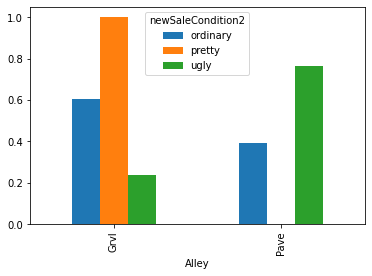

In [81]:
myresults = pd.crosstab(iowa_df['Alley'], iowa_df['newSaleCondition2'], normalize='columns')
myresults.plot(kind='bar');

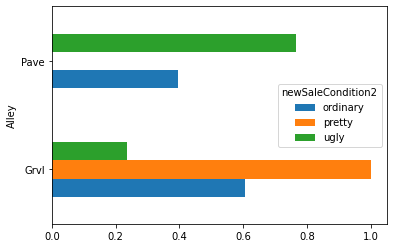

In [82]:
myresults.plot(kind='barh');

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [ ]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# %cd instacart_2017_05_01